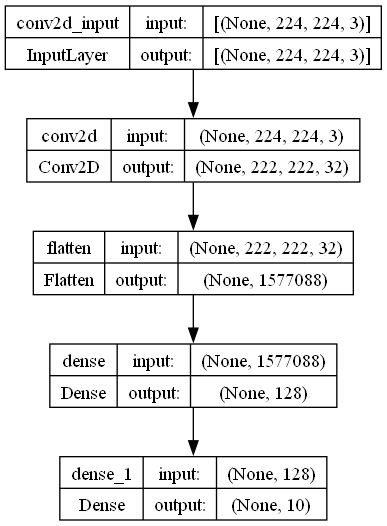

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import plot_model

# Define your neural network architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


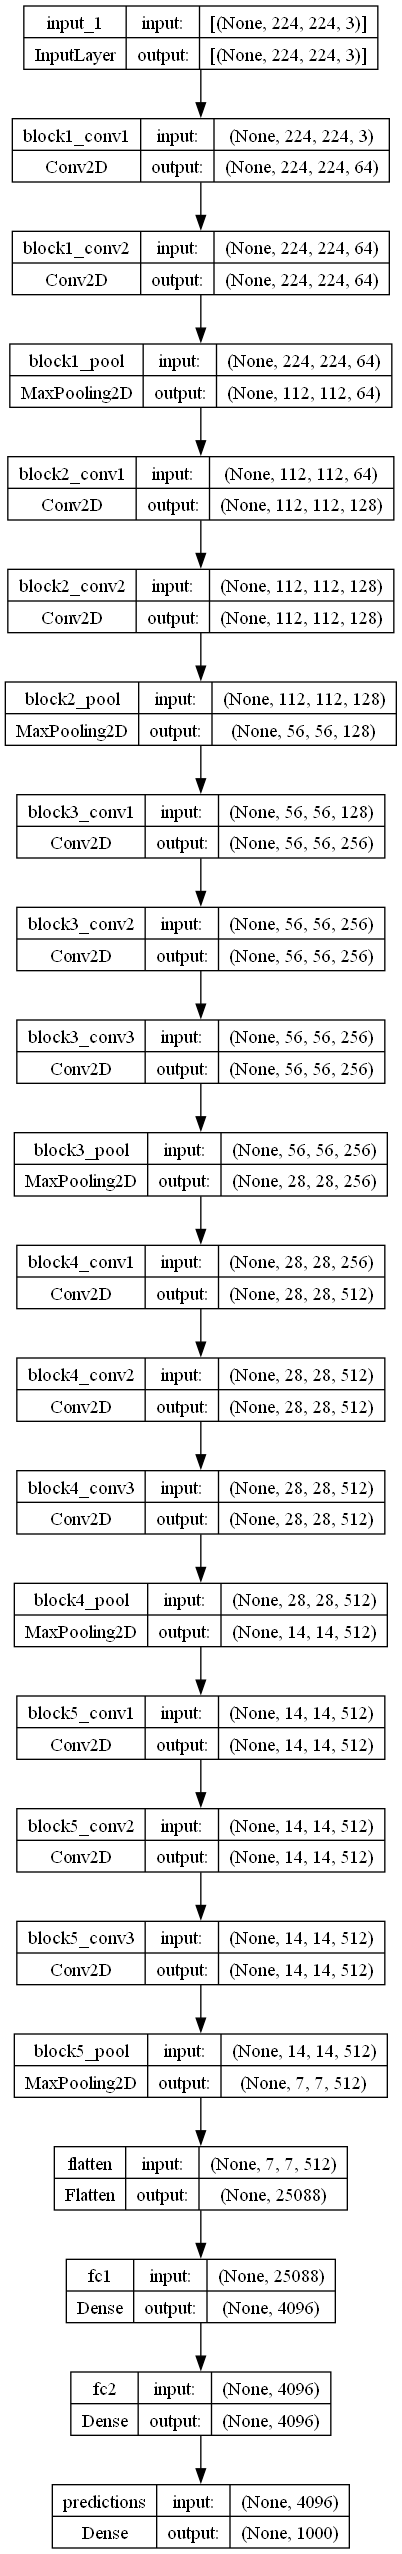

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

# Load VGG16 model
model = VGG16()

# Plot the model architecture
plot_model(model, to_file='vgg16.png', show_shapes=True, show_layer_names=True)


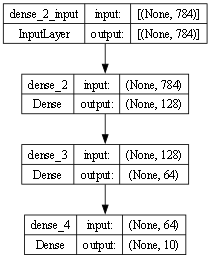

In [3]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple Sequential model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Plot the model with customized options
plot_model(model, show_shapes=True, show_layer_names=True,
           rankdir='TB', expand_nested=False, dpi=60)


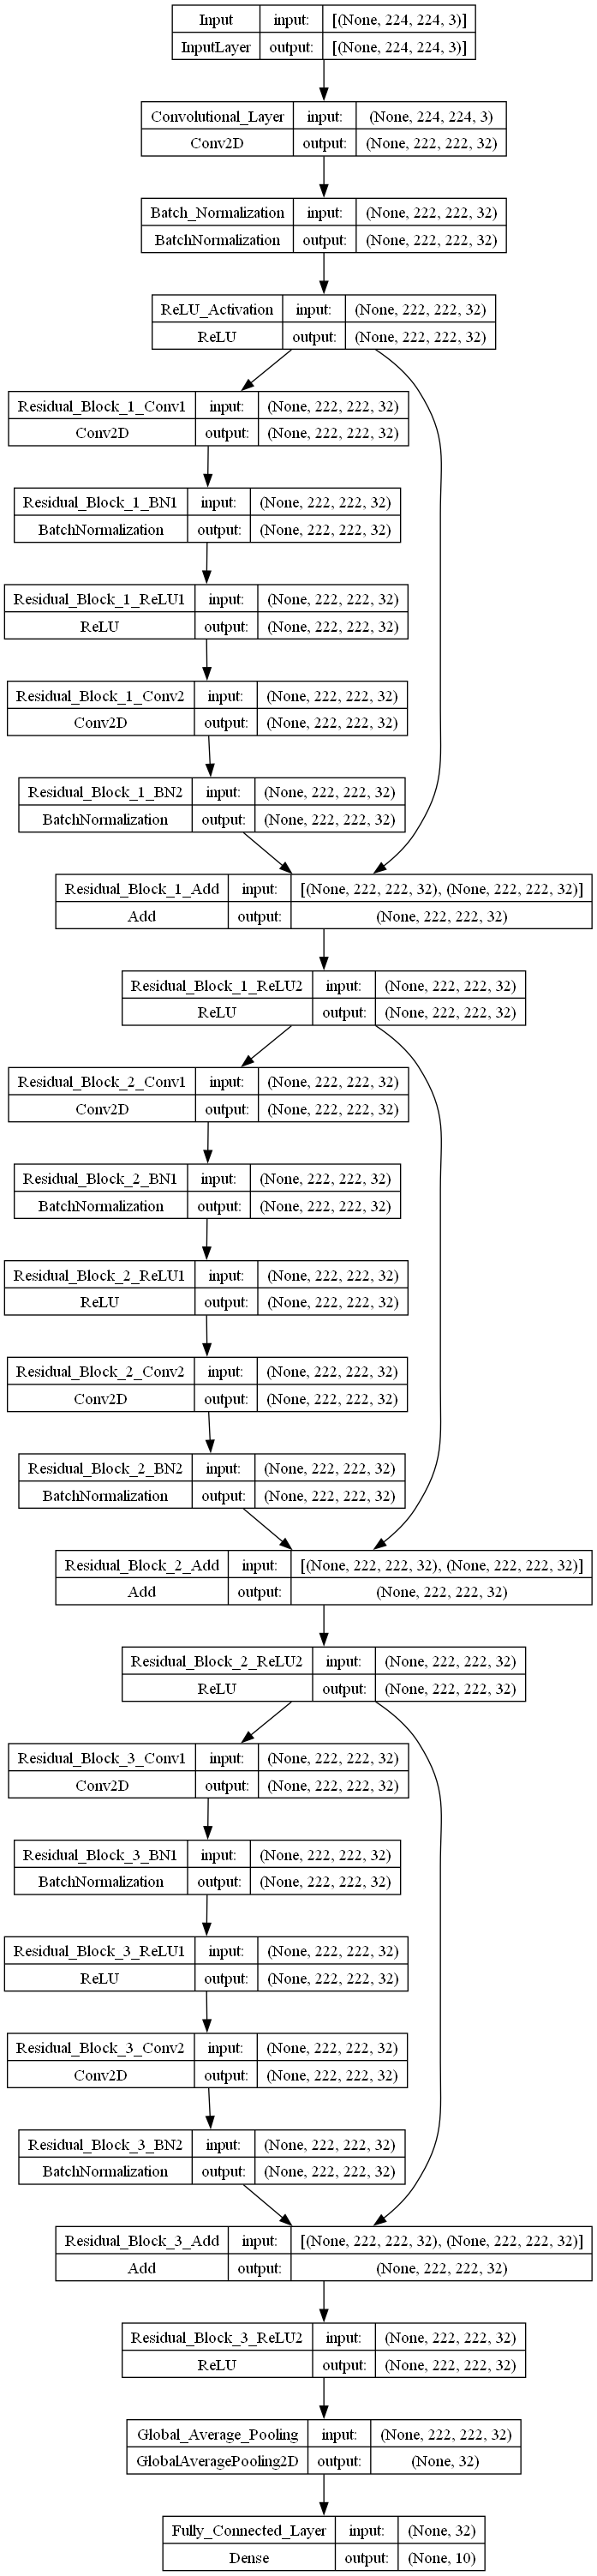

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, BatchNormalization, ReLU, Add, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

# Input layer
input_layer = Input(shape=(224, 224, 3), name='Input')

# Convolutional Layer
conv_layer = Conv2D(32, (3,3), name='Convolutional_Layer')(input_layer)

# Batch Normalization
bn_layer = BatchNormalization(name='Batch_Normalization')(conv_layer)

# ReLU Activation
relu_layer = ReLU(name='ReLU_Activation')(bn_layer)

# Residual Blocks
def residual_block(x, filters, block_number):
    y = Conv2D(filters, (3,3), padding='same', name=f'Residual_Block_{block_number}_Conv1')(x)
    y = BatchNormalization(name=f'Residual_Block_{block_number}_BN1')(y)
    y = ReLU(name=f'Residual_Block_{block_number}_ReLU1')(y)
    
    y = Conv2D(filters, (3,3), padding='same', name=f'Residual_Block_{block_number}_Conv2')(y)
    y = BatchNormalization(name=f'Residual_Block_{block_number}_BN2')(y)
    
    # Skip connection
    y = Add(name=f'Residual_Block_{block_number}_Add')([x, y])
    y = ReLU(name=f'Residual_Block_{block_number}_ReLU2')(y)
    
    return y

residual_blocks = 3  # You can adjust this number
prev_layer = relu_layer
for i in range(residual_blocks):
    prev_layer = residual_block(prev_layer, 32, i+1)

# Global Average Pooling
gap_layer = GlobalAveragePooling2D(name='Global_Average_Pooling')(prev_layer)

# Fully Connected Layer
output_layer = Dense(10, activation='softmax', name='Fully_Connected_Layer')(gap_layer)

# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
